<a href="https://colab.research.google.com/github/kingketan9/DeepLearningLabs/blob/main/Ass6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Analyze the use of tran_test_split class of Scikitlearn library and study the effects of different ratios of Training Data and Test data on the accuracy of the model

train_test_split epoch vs accuracy loss vs epoch

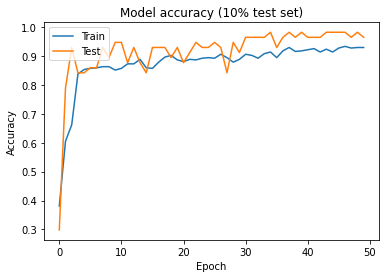

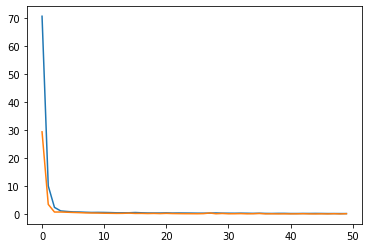

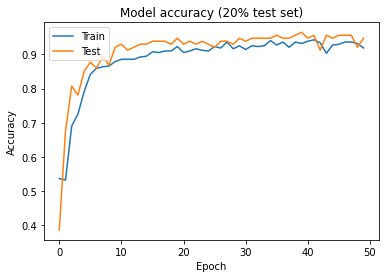

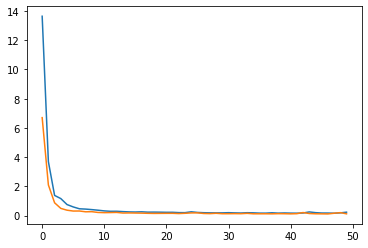

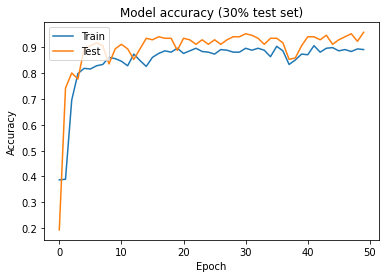

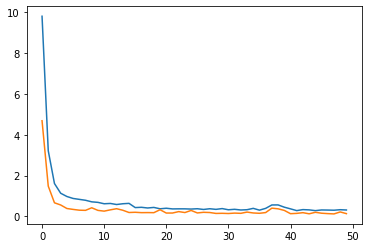

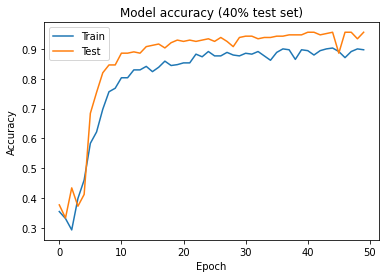

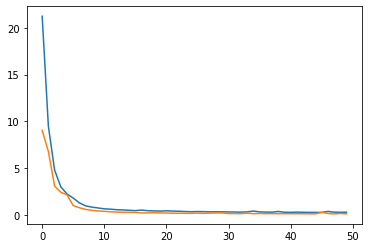

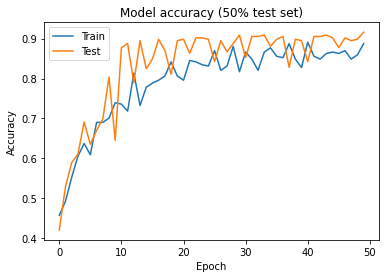

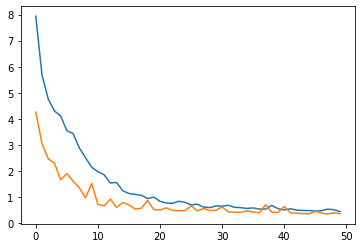

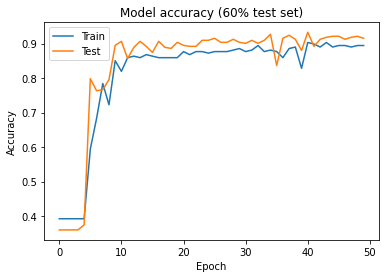

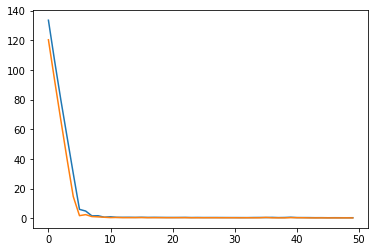

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target

test_size = [.1, .2, .3 , .4, .5, .6]

history_list = [] 

for test_size_rate in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_rate, random_state=42)

    model = Sequential()
    model.add(Dense(30, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=0)
    history_list.append(history)

for i, history in enumerate(history_list):
    plt.figure()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Model accuracy ({test_size[i]*100:.0f}% test set)')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

2. Develop an ANN model to analyze the implementation of Dropout as regularization

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.datasets import mnist
from keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 784) / 255.0
X_test = X_test.reshape(-1, 784) / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

Dropouts = [.1, .3, .5, .7]
results = []
for dropout_rate in Dropouts:
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

    test_loss, test_acc = model.evaluate(X_test, y_test)
    results.append((dropout_rate, test_acc))

for result in results:
    print('Dropout rate:', result[0], '- Test accuracy:', result[1])

Epoch 1/10
469/469 [==============================] - 12s 23ms/step - loss: 0.2323 - accuracy: 0.9307 - val_loss: 0.1055 - val_accuracy: 0.9659
Epoch 2/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0901 - accuracy: 0.9723 - val_loss: 0.0762 - val_accuracy: 0.9761
Epoch 3/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0615 - accuracy: 0.9806 - val_loss: 0.0725 - val_accuracy: 0.9772
Epoch 4/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0456 - accuracy: 0.9849 - val_loss: 0.0684 - val_accuracy: 0.9800
Epoch 5/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0373 - accuracy: 0.9875 - val_loss: 0.0734 - val_accuracy: 0.9782
Epoch 6/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0306 - accuracy: 0.9900 - val_loss: 0.0714 - val_accuracy: 0.9797
Epoch 7/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0241 - accuracy: 0.9917 - val_loss: 0.0680 - val_accuracy: 